In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import ast

In [2]:
# dataset interim processed
DATASET = '../data/interim/so-questions-preproc.csv'

df = pd.read_csv(DATASET)
df.head(3)

Unnamed: 0        creation_date   user_id  reputation  view_count  \
0           0  2022-02-05 10:36:08   6709058          81          13   
1           1  2022-02-05 05:45:33   7116458          11          19   
2           2  2022-02-04 20:05:21  16389467          15          14   

                                               title  \
0  Is there a way to allow non-root pods to write...   
1  how to create Snapshot &amp; Release Folder fo...   
2                 mocha: command not found in GitLab   

                                                body  \
0  im trying to deploy gitlab to onpremises k8s c...   
1  i want to create snapshot amp release folder i...   
2  i want to try cicd so i am working on a simple...   

                                           title_prc  \
0  ['is', 'there', 'a', 'way', 'to', 'allow', 'no...   
1  ['how', 'to', 'create', 'snapshot', '&', 'amp'...   
2  ['mocha', ':', 'command', 'not', 'found', 'in'...   

                                            body_prc  
0  ['i', 'm', 'trying', 'to', 'deploy', 'gitlab',...  
1  ['i', 'want', 'to', 'create', 'snapshot', 'amp...  
2  ['i', 'want', 'to', 'try', 'cicd', 'so', 'i', ...

In [3]:
df_questions = df.copy()

In [8]:
for col in df_questions.columns:
    print(col)

Unnamed: 0
creation_date
user_id
reputation
view_count
title
body
title_prc
body_prc


In [9]:
df_questions.drop(['Unnamed: 0'], axis =1)

creation_date   user_id  reputation  view_count  \
0   2022-02-05 10:36:08   6709058          81          13   
1   2022-02-05 05:45:33   7116458          11          19   
2   2022-02-04 20:05:21  16389467          15          14   
3   2022-02-04 09:36:00  10030258         138          13   
4   2022-02-04 08:47:59  13000747          15          17   
..                  ...       ...         ...         ...   
95  2022-01-28 10:22:02   1983854      245036          25   
96  2022-01-28 10:19:00  18056092          13          31   
97  2022-01-28 05:12:39  14507451          31          23   
98  2022-01-27 23:30:16    273924        5337          30   
99  2022-01-27 22:33:17  15173118          15          48   

                                                title  \
0   Is there a way to allow non-root pods to write...   
1   how to create Snapshot &amp; Release Folder fo...   
2                  mocha: command not found in GitLab   
3   Cleaning up project directory and file based v...   
4   remote: The project you were looking for could...   
..                                                ...   
95  How can I assign an issue to a milestone autom...   
96                       Gitlab multiple folders rule   
97  GITLAB Warning - &#39;NO NSA Protected Informa...   
98  Why is GitLab CI SAST not exluding directories...   
99    Included file does not have a valid YAML syntax   

                                                 body  \
0   im trying to deploy gitlab to onpremises k8s c...   
1   i want to create snapshot amp release folder i...   
2   i want to try cicd so i am working on a simple...   
3   i started learning gitlabci using a course on ...   
4   im getting this error while trying to deploy m...   
..                                                ...   
95  i am using gitlab issue templates and they wor...   
96  are there ways to merge row changes of multipl...   
97  from past two weeks i am getting this warning ...   
98  i have enabled sast scanning in gitlab ci gitl...   
99  i am including a remote gitlabciyml file but c...   

                                            title_prc  \
0   ['is', 'there', 'a', 'way', 'to', 'allow', 'no...   
1   ['how', 'to', 'create', 'snapshot', '&', 'amp'...   
2   ['mocha', ':', 'command', 'not', 'found', 'in'...   
3   ['cleaning', 'up', 'project', 'directory', 'an...   
4   ['remote', ':', 'the', 'project', 'you', 'were...   
..                                                ...   
95  ['how', 'can', 'i', 'assign', 'an', 'issue', '...   
96          ['gitlab', 'multiple', 'folders', 'rule']   
97  ['gitlab', 'warning', '-', '&', '#', '39;no', ...   
98  ['why', 'is', 'gitlab', 'ci', 'sast', 'not', '...   
99  ['included', 'file', 'does', 'not', 'have', 'a...   

                                             body_prc  
0   ['i', 'm', 'trying', 'to', 'deploy', 'gitlab',...  
1   ['i', 'want', 'to', 'create', 'snapshot', 'amp...  
2   ['i', 'want', 'to', 'try', 'cicd', 'so', 'i', ...  
3   ['i', 'started', 'learning', 'gitlabci', 'usin...  
4   ['i', 'm', 'getting', 'this', 'error', 'while'...  
..                                                ...  
95  ['i', 'am', 'using', 'gitlab', 'issue', 'templ...  
96  ['are', 'there', 'ways', 'to', 'merge', 'row',...  
97  ['from', 'past', 'two', 'weeks', 'i', 'am', 'g...  
98  ['i', 'have', 'enabled', 'sast', 'scanning', '...  
99  ['i', 'am', 'including', 'a', 'remote', 'gitla...  

[100 rows x 8 columns]

In [10]:
title_processed = df_questions['title_prc'].to_numpy()

In [14]:
for x in range(0,3):
    print(f'{title_processed[x]}')


['is', 'there', 'a', 'way', 'to', 'allow', 'non', '-', 'root', 'pods', 'to', 'write', 'on', 'glusterfs', 'volumes']
['how', 'to', 'create', 'snapshot', '&', 'amp', ';', 'release', 'folder', 'for', 'artifactory', 'using', 'ci', 'pipeline', '?']
['mocha', ':', 'command', 'not', 'found', 'in', 'gitlab']


In [21]:
len(title_processed)

100

In [44]:
title_corpus = [word for title_list in title_processed for word in ast.literal_eval(title_list)]

In [80]:
print(f'number of words in all titles combined: {len(title_corpus)}')

number of words in all titles combined: 1144


In [83]:
gitlab_count = title_corpus.count('to')
print(gitlab_count)

55


In [52]:
title_corpus[:10]

['is', 'there', 'a', 'way', 'to', 'allow', 'non', '-', 'root', 'pods']

In [53]:
print(len(set(title_corpus)))

445


In [17]:
count_words = defaultdict()

In [40]:
for i, word in enumerate(title_corpus):
    if i < 3:
        print(title_corpus[i])

is
there
a


In [49]:
words_freq = {word:0 for word in title_corpus}

In [51]:
len(words_freq)

445

In [57]:
for key in title_corpus:
    if key in count_words:
        count_words[key]= count_words[key]+1
    else:
        count_words[key] = 0

In [58]:
len(count_words)

445

In [60]:
count_words.values()

dict_values([14, 5, 26, 5, 56, 1, 1, 17, 3, 1, 3, 20, 1, 1, 22, 1, 1, 7, 3, 6, 3, 3, 9, 1, 12, 27, 18, 29, 1, 18, 1, 17, 3, 30, 67, 1, 1, 8, 3, 8, 12, 3, 5, 1, 9, 7, 8, 1, 6, 1, 7, 14, 4, 1, 1, 1, 3, 4, 1, 3, 5, 4, 6, 1, 1, 15, 1, 3, 1, 1, 4, 1, 1, 1, 7, 1, 1, 3, 3, 7, 1, 1, 1, 5, 3, 6, 4, 1, 3, 4, 1, 3, 6, 1, 1, 8, 3, 1, 1, 1, 3, 1, 4, 1, 1, 7, 3, 3, 1, 1, 1, 3, 3, 1, 5, 1, 1, 3, 13, 4, 4, 3, 3, 1, 1, 1, 1, 3, 1, 11, 11, 1, 1, 7, 1, 3, 4, 1, 9, 4, 1, 3, 1, 12, 6, 4, 1, 3, 1, 1, 1, 1, 1, 1, 3, 7, 1, 1, 1, 7, 3, 1, 1, 1, 5, 1, 7, 4, 1, 6, 4, 1, 9, 4, 4, 3, 1, 1, 8, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 3, 4, 1, 7, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 5, 3, 3, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 

In [61]:
sum(count_words.values())

1286

In [67]:
sc_words = {key:value for key, value in sorted(count_words.items(), key= lambda element: element[1], reverse=True)}

In [73]:
sc_words

{'gitlab': 67,
 'to': 56,
 'in': 30,
 '?': 29,
 'ci': 27,
 'a': 26,
 'how': 22,
 'on': 20,
 'pipeline': 18,
 ':': 18,
 '-': 17,
 'not': 17,
 '/': 15,
 'is': 14,
 'the': 14,
 'from': 13,
 'using': 12,
 'file': 12,
 'branch': 12,
 'i': 11,
 'run': 11,
 'for': 9,
 'error': 9,
 ',': 9,
 'can': 9,
 'project': 8,
 'and': 8,
 'failed': 8,
 'git': 8,
 'cd': 8,
 '&': 7,
 'job': 7,
 'remote': 7,
 'api': 7,
 'with': 7,
 'when': 7,
 'variable': 7,
 '(': 7,
 ')': 7,
 'push': 7,
 '`': 7,
 ';': 6,
 'code': 6,
 'it': 6,
 'make': 6,
 'deploy': 6,
 'name': 6,
 'repository': 6,
 'there': 5,
 'way': 5,
 'variables': 5,
 'permission': 5,
 'files': 5,
 'maven': 5,
 'of': 5,
 'an': 5,
 'jobs': 5,
 'commit': 5,
 'you': 4,
 'or': 4,
 'view': 4,
 'add': 4,
 'cypress': 4,
 'as': 4,
 'my': 4,
 'private': 4,
 'registry': 4,
 'has': 4,
 'but': 4,
 'running': 4,
 'failure': 4,
 'while': 4,
 'read': 4,
 'json': 4,
 'build': 4,
 'access': 4,
 'them': 4,
 'if': 4,
 'changes': 4,
 '#': 4,
 'feature': 4,
 'runner': 4,
 '

In [76]:
word_cloud = WordCloud(background_color='white', random_state=10)
word_cloud.fit_words(sc_words)

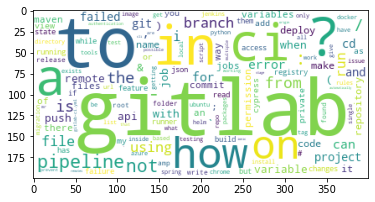

In [77]:
plt.imshow(word_cloud)
plt.show()

This initial intent of building a word cloud show us that to extract more meaning we should use bi-grams or tri-grams, probably along with some TF-IDF 

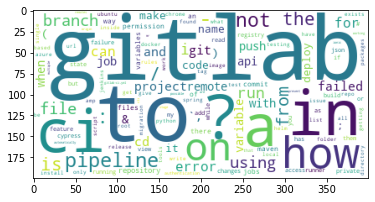

In [78]:
plt.imshow(word_cloud.generate_from_frequencies(sc_words))

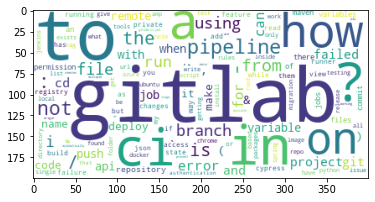

In [79]:
plt.imshow(word_cloud.generate_from_frequencies(sc_words))